## **ECGR 5106 Final Project - Real Time Stock Price Prediction (Using LSTM and GRU)**


# Load Necessary Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import SGD

from pandas_datareader.data import DataReader

# Code Snippet to Ignore Warnings
import warnings
warnings.simplefilter("ignore")

# Code Snippet to Use "Seaborn" Style for Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Define Global Variables:

In [ ]:
start = datetime(1984, 9, 7)
end = datetime(2017, 11, 10)

tstart = 1970
tend = 2015

window_size = 60
features = 1

# Define Global Functions:

In [ ]:
def train_test_plot(dataset, tstart, tend, company):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title(company + "'s Stock Histroy")
    plt.show()

def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"]
    test = dataset.loc[f"{tend+1}":, "High"]
    return train, test

def train_test_split_values(dataset, tstart, tend):
    train, test =  train_test_split(dataset, tstart, tend)
    return train.values, test.values

def split_sequence(sequence, window):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + window
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("Root Mean Squared Error (RMSE) {:.2f}.".format(rmse))

# The LSTM Model:

In [ ]:
# Custom Function Defined that trains and Plots the Predicted Results based on LSTM Model
def create_lstm(dataset):
    # Split the dataset
    training_set, test_set = train_test_split_values(dataset, tstart, tend)

    # Scaling the training set
    sc = MinMaxScaler(feature_range=(0, 1))
    training_set = training_set.reshape(-1, 1)
    training_set_scaled = sc.fit_transform(training_set)

    # Split and setup the training set
    X_train, y_train = split_sequence(training_set_scaled, window_size)
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

    # Create the LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(window_size, features)))
    model_lstm.add(Dense(25))
    model_lstm.add(Dense(units=1))

    model_lstm.compile(optimizer='adam', loss='mse')
    model_lstm.fit(X_train, y_train, epochs=15, batch_size=32)

    model_lstm.summary()

    # Run some test predictions and plot the model
    dataset_total = dataset.loc[:,"High"]
    inputs = dataset_total[len(dataset_total) - len(test_set) - window_size :].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    X_test, y_test = split_sequence(inputs, window_size)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
    predicted_stock_price = model_lstm.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    y_test = sc.inverse_transform(y_test)

    plot_predictions(y_test,predicted_stock_price)

    return_rmse(y_test,predicted_stock_price)

# The GRU model:

In [ ]:
# Custom function defined that trains and plots the Predicted Results based on GRU Model
def create_gru(dataset):
    # Split the dataset
    training_set, test_set = train_test_split_values(dataset, tstart, tend)

    # Scale the training set
    sc = MinMaxScaler(feature_range=(0, 1))
    training_set = training_set.reshape(-1, 1)
    training_set_scaled = sc.fit_transform(training_set)

    # Split and setup the training set
    X_train, y_train = split_sequence(training_set_scaled, window_size)
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

    # Create the LSTM model
    model_gru = Sequential()
    model_gru.add(GRU(units=125, activation="tanh", input_shape=(window_size, features)))
    model_gru.add(Dense(units=1))

    model_gru.compile(optimizer="adam", loss="mse")
    model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

    model_gru.summary()

    # Run some test predictions and plot the model
    dataset_total = dataset.loc[:,"High"]
    inputs = dataset_total[len(dataset_total) - len(test_set) - window_size :].values
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    X_test, y_test = split_sequence(inputs, window_size)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
    GRU_predicted_stock_price = model_gru.predict(X_test)
    GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
    y_test = sc.inverse_transform(y_test)

    plot_predictions(y_test, GRU_predicted_stock_price)

    return_rmse(y_test,GRU_predicted_stock_price)

Load the data:

In [ ]:
# Loading the CSV File for Ford (Automobile Company)
csv_list = [
    "https://raw.githubusercontent.com/Ntambe25/Real-Time-Stock-Prediction/main/Data/ford.csv",
    "https://raw.githubusercontent.com/Ntambe25/Real-Time-Stock-Prediction/main/Data/tesla.csv",
    "https://raw.githubusercontent.com/Ntambe25/Real-Time-Stock-Prediction/main/Data/jp_morgan_chase.csv",
    "https://raw.githubusercontent.com/Ntambe25/Real-Time-Stock-Prediction/main/Data/wells_fargo.csv",
    "https://raw.githubusercontent.com/Ntambe25/Real-Time-Stock-Prediction/main/Data/coca_cola.csv"
]
labels = [
    "Ford",
    "Tesla",
    "JP Morgan & Chase",
    "Wells Fargo",
    "Coca-Cola"
]
dataframes = list()

for csv_item in csv_list:
    df = pd.read_csv(csv_item)

    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.drop(['OpenInt'], axis=1)
    df['Company'] = pd.factorize(df['Company'])[0]

    dataframes.append(df)

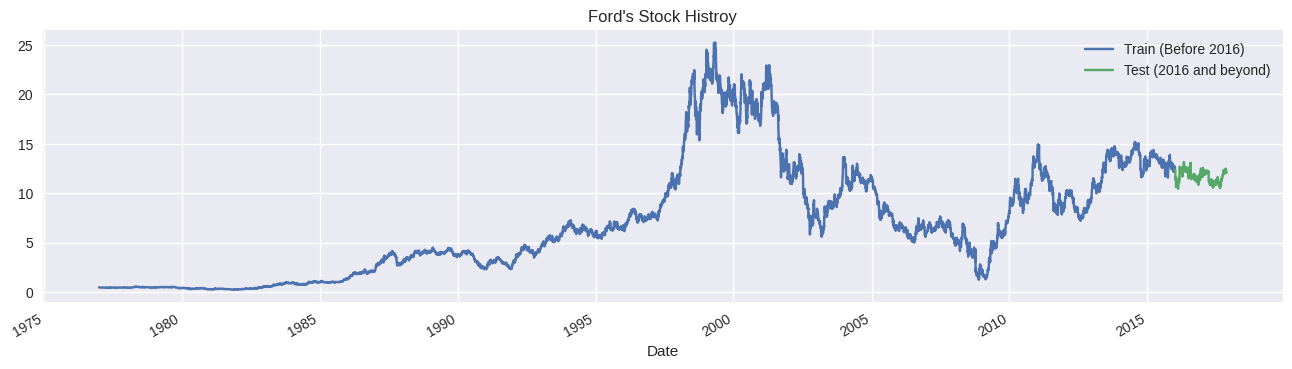

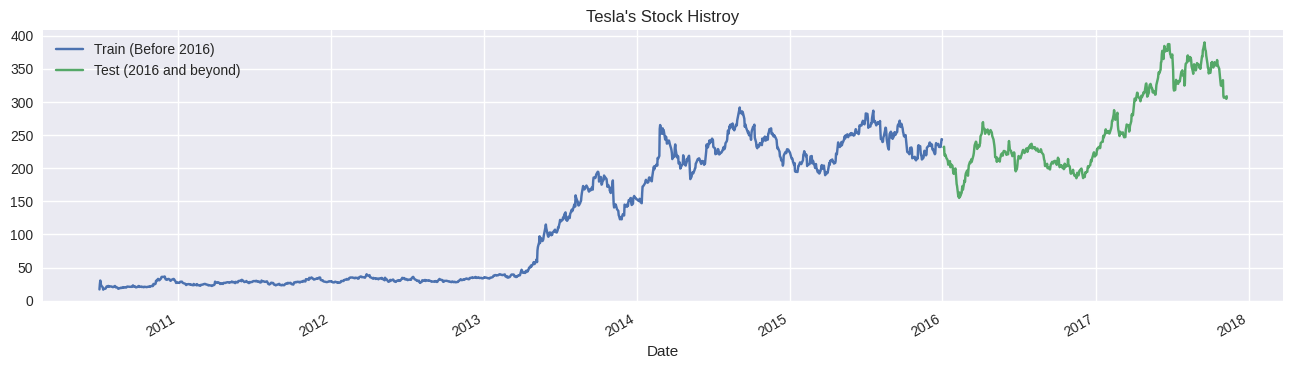

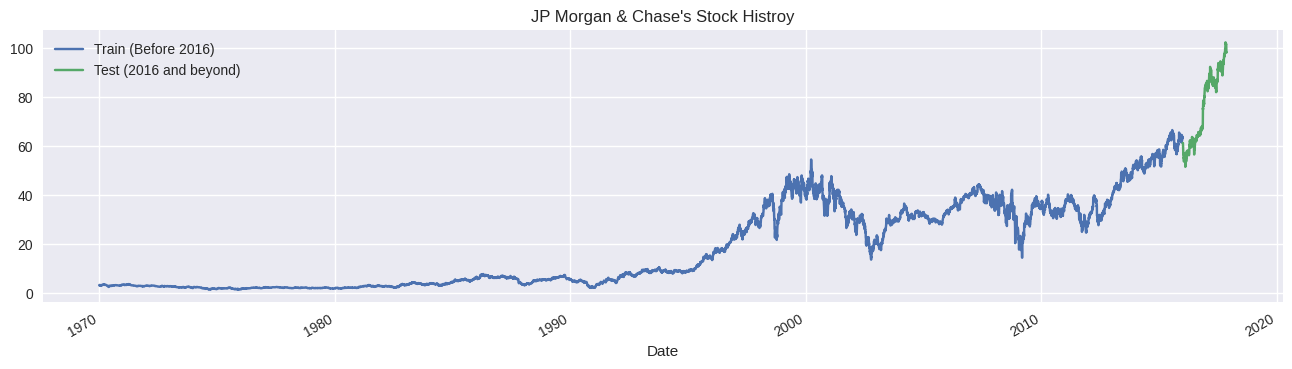

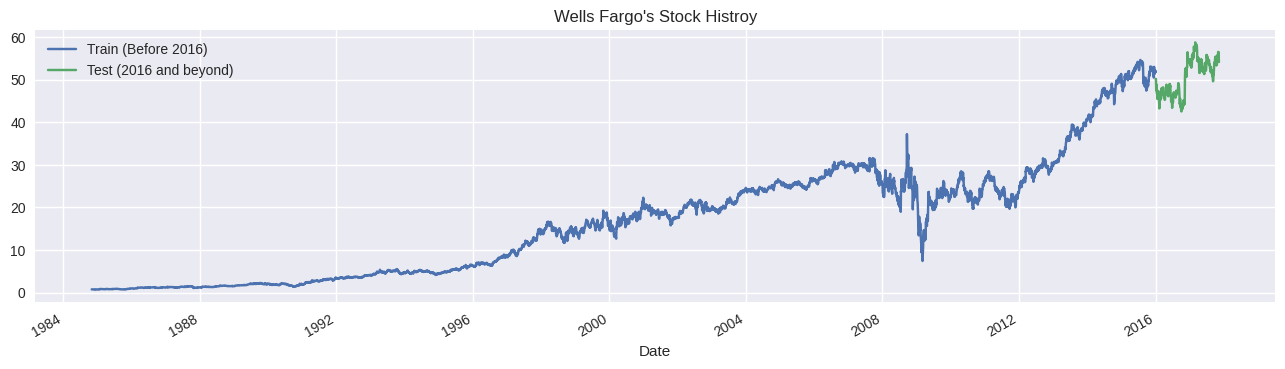

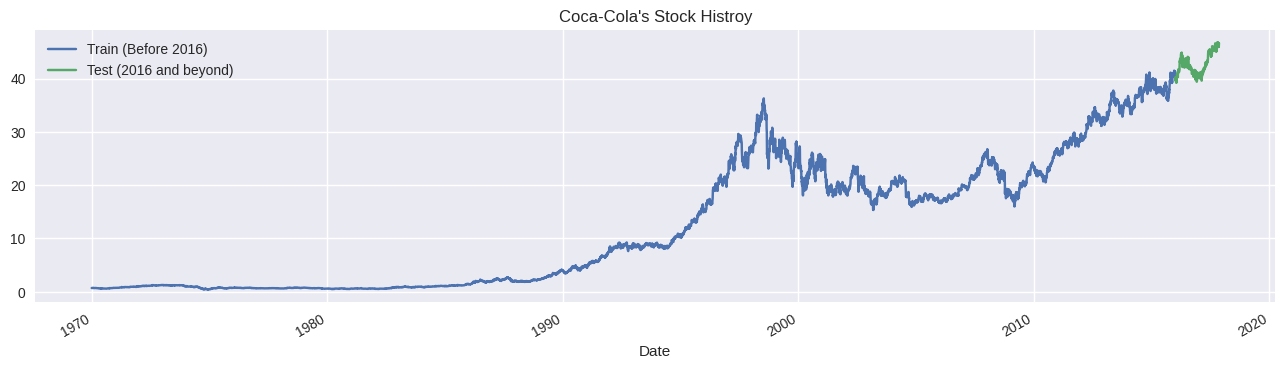

In [ ]:
index = 0
for df in dataframes:
    dataset = df
    train_test_plot(dataset,tstart,tend,labels[index])
    index += 1

## LSTM:

Ford:

In [ ]:
# Training the LSTM Model for Ford
dataset = dataframes[0]
create_lstm(dataset)

Tesla:

Epoch 1/15
42/42 [==============================] - 3s 9ms/step - loss: 0.0148
Epoch 2/15
42/42 [==============================] - 0s 8ms/step - loss: 7.7184e-04
Epoch 3/15
42/42 [==============================] - 0s 8ms/step - loss: 6.5272e-04
Epoch 4/15
42/42 [==============================] - 0s 7ms/step - loss: 6.2885e-04
Epoch 5/15
42/42 [==============================] - 0s 7ms/step - loss: 6.0025e-04
Epoch 6/15
42/42 [==============================] - 0s 8ms/step - loss: 5.9369e-04
Epoch 7/15
42/42 [==============================] - 0s 7ms/step - loss: 5.9749e-04
Epoch 8/15
42/42 [==============================] - 0s 6ms/step - loss: 5.8326e-04
Epoch 9/15
42/42 [==============================] - 0s 5ms/step - loss: 5.5607e-04
Epoch 10/15
42/42 [==============================] - 0s 5ms/step - loss: 5.3118e-04
Epoch 11/15
42/42 [==============================] - 0s 5ms/step - loss: 5.2929e-04
Epoch 12/15
42/42 [==============================] - 0s 5ms/step - loss: 5.1910e-04
Epoch

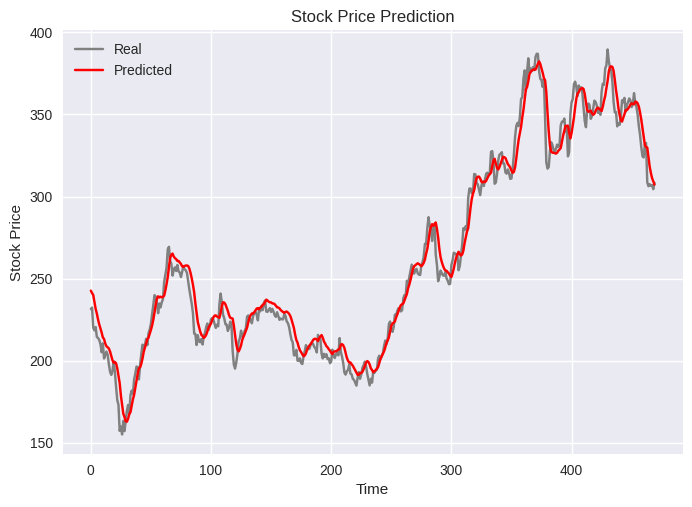

Root Mean Squared Error (RMSE) 9.14.


In [ ]:
# Training the LSTM Model for Tesla
dataset = dataframes[1]
create_lstm(dataset)

JP Morgan & Chase:

Epoch 1/15
361/361 [==============================] - 4s 5ms/step - loss: 9.0397e-04
Epoch 2/15
361/361 [==============================] - 2s 5ms/step - loss: 1.6436e-04
Epoch 3/15
361/361 [==============================] - 2s 6ms/step - loss: 1.2900e-04
Epoch 4/15
361/361 [==============================] - 3s 8ms/step - loss: 1.1375e-04
Epoch 5/15
361/361 [==============================] - 2s 5ms/step - loss: 1.0808e-04
Epoch 6/15
361/361 [==============================] - 2s 5ms/step - loss: 9.6297e-05
Epoch 7/15
361/361 [==============================] - 2s 5ms/step - loss: 9.4145e-05
Epoch 8/15
361/361 [==============================] - 2s 5ms/step - loss: 9.1956e-05
Epoch 9/15
361/361 [==============================] - 2s 6ms/step - loss: 7.8450e-05
Epoch 10/15
361/361 [==============================] - 2s 6ms/step - loss: 7.1265e-05
Epoch 11/15
361/361 [==============================] - 2s 5ms/step - loss: 7.4271e-05
Epoch 12/15
361/361 [==============================] - 2s 5ms/s

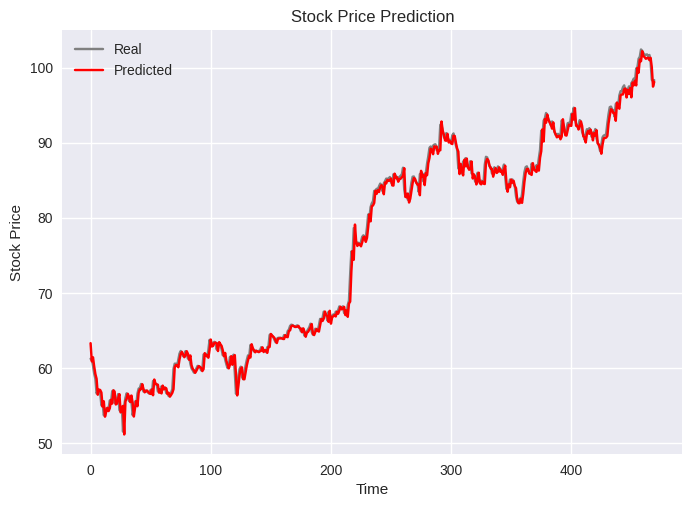

Root Mean Squared Error (RMSE) 0.91.


In [ ]:
# Training the LSTM Model for JP Morgan & Chase
dataset = dataframes[2]
create_lstm(dataset)

Wells Fargo:

Epoch 1/15
244/244 [==============================] - 4s 6ms/step - loss: 0.0017
Epoch 2/15
244/244 [==============================] - 1s 5ms/step - loss: 1.1504e-04
Epoch 3/15
244/244 [==============================] - 1s 5ms/step - loss: 1.1185e-04
Epoch 4/15
244/244 [==============================] - 1s 5ms/step - loss: 1.0969e-04
Epoch 5/15
244/244 [==============================] - 1s 5ms/step - loss: 1.0500e-04
Epoch 6/15
244/244 [==============================] - 1s 5ms/step - loss: 9.8580e-05
Epoch 7/15
244/244 [==============================] - 1s 5ms/step - loss: 9.1359e-05
Epoch 8/15
244/244 [==============================] - 2s 7ms/step - loss: 8.5328e-05
Epoch 9/15
244/244 [==============================] - 1s 6ms/step - loss: 7.9495e-05
Epoch 10/15
244/244 [==============================] - 1s 5ms/step - loss: 7.8657e-05
Epoch 11/15
244/244 [==============================] - 1s 5ms/step - loss: 8.0327e-05
Epoch 12/15
244/244 [==============================] - 1s 5ms/step 

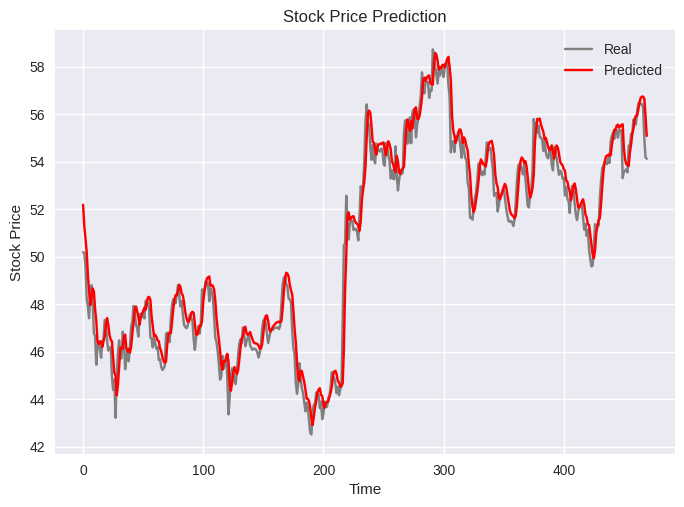

Root Mean Squared Error (RMSE) 0.77.


In [ ]:
# Training the LSTM Model for Wells Fargo
dataset = dataframes[3]
create_lstm(dataset)

Coca-Cola:

Epoch 1/15
361/361 [==============================] - 5s 5ms/step - loss: 0.0016
Epoch 2/15
361/361 [==============================] - 2s 5ms/step - loss: 9.9225e-05
Epoch 3/15
361/361 [==============================] - 2s 5ms/step - loss: 1.0091e-04
Epoch 4/15
361/361 [==============================] - 2s 5ms/step - loss: 7.8546e-05
Epoch 5/15
361/361 [==============================] - 2s 6ms/step - loss: 7.3242e-05
Epoch 6/15
361/361 [==============================] - 2s 6ms/step - loss: 6.4998e-05
Epoch 7/15
361/361 [==============================] - 2s 5ms/step - loss: 6.5931e-05
Epoch 8/15
361/361 [==============================] - 2s 5ms/step - loss: 6.0664e-05
Epoch 9/15
361/361 [==============================] - 2s 5ms/step - loss: 5.7611e-05
Epoch 10/15
361/361 [==============================] - 2s 5ms/step - loss: 4.8791e-05
Epoch 11/15
361/361 [==============================] - 2s 5ms/step - loss: 5.5077e-05
Epoch 12/15
361/361 [==============================] - 2s 7ms/step 

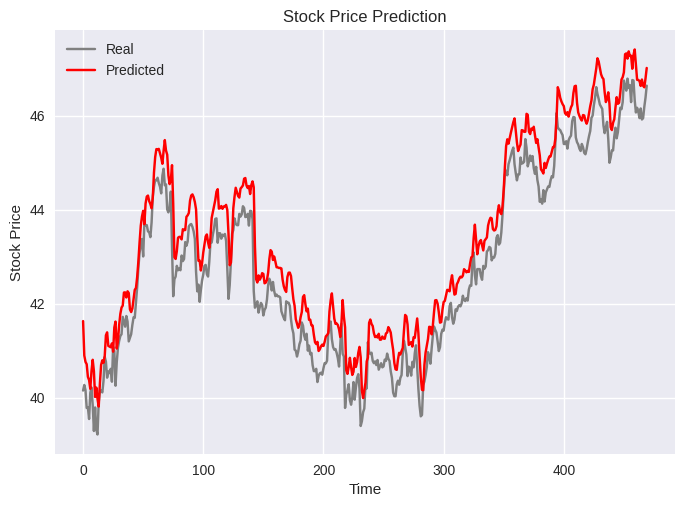

Root Mean Squared Error (RMSE) 0.66.


In [ ]:
# Training the LSTM Model for Coca-Cola
dataset = dataframes[4]
create_lstm(dataset)

## GRU:

Ford:

Epoch 1/10
306/306 [==============================] - 4s 5ms/step - loss: 0.0030
Epoch 2/10
306/306 [==============================] - 2s 6ms/step - loss: 1.0514e-04
Epoch 3/10
306/306 [==============================] - 2s 5ms/step - loss: 8.8926e-05
Epoch 4/10
306/306 [==============================] - 1s 5ms/step - loss: 8.3475e-05
Epoch 5/10
306/306 [==============================] - 1s 5ms/step - loss: 8.1495e-05
Epoch 6/10
306/306 [==============================] - 1s 5ms/step - loss: 7.6298e-05
Epoch 7/10
306/306 [==============================] - 1s 5ms/step - loss: 7.0475e-05
Epoch 8/10
306/306 [==============================] - 1s 5ms/step - loss: 7.2320e-05
Epoch 9/10
306/306 [==============================] - 1s 5ms/step - loss: 7.3322e-05
Epoch 10/10
306/306 [==============================] - 2s 6ms/step - loss: 6.5771e-05
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   

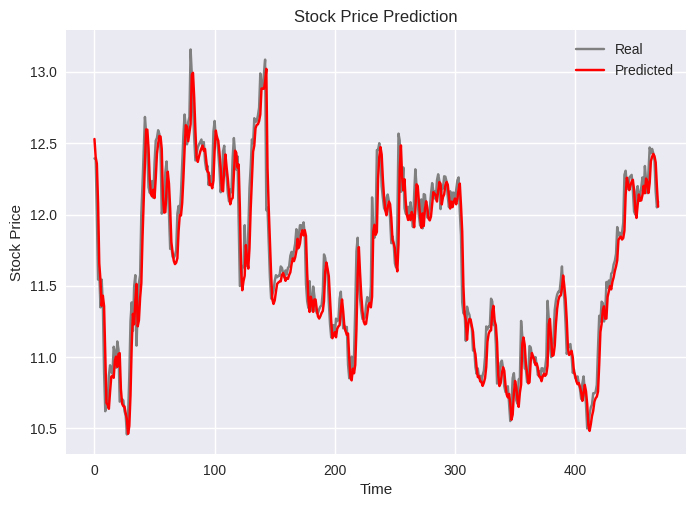

Root Mean Squared Error (RMSE) 0.18.


In [ ]:
# Training the GRU Model for Ford
dataset = dataframes[0]
create_gru(dataset)

Tesla:

Epoch 1/10
42/42 [==============================] - 0s 6ms/step - loss: 6.0992e-04
Epoch 3/10
42/42 [==============================] - 0s 5ms/step - loss: 4.8029e-04
Epoch 4/10
42/42 [==============================] - 0s 5ms/step - loss: 4.7015e-04
Epoch 5/10
42/42 [==============================] - 0s 5ms/step - loss: 4.4876e-04
Epoch 6/10
42/42 [==============================] - 0s 5ms/step - loss: 4.0981e-04
Epoch 7/10
42/42 [==============================] - 0s 5ms/step - loss: 3.9708e-04
Epoch 8/10
42/42 [==============================] - 0s 5ms/step - loss: 3.9751e-04
Epoch 9/10
42/42 [==============================] - 0s 5ms/step - loss: 3.6864e-04
Epoch 10/10
42/42 [==============================] - 0s 5ms/step - loss: 3.6090e-04
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 125)               48000     
                               

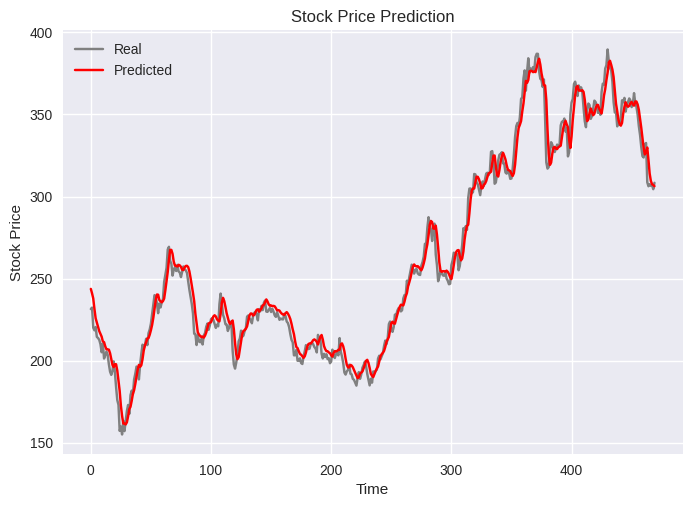

Root Mean Squared Error (RMSE) 7.61.


In [ ]:
# Training the GRU Model for Tesla
dataset = dataframes[1]
create_gru(dataset)

JP Morgan & Chase:

Epoch 1/10
361/361 [==============================] - 4s 5ms/step - loss: 0.0022
Epoch 2/10
361/361 [==============================] - 2s 5ms/step - loss: 9.4220e-05
Epoch 3/10
361/361 [==============================] - 2s 5ms/step - loss: 8.4110e-05
Epoch 4/10
361/361 [==============================] - 2s 5ms/step - loss: 7.7025e-05
Epoch 5/10
361/361 [==============================] - 2s 5ms/step - loss: 7.6648e-05
Epoch 6/10
361/361 [==============================] - 2s 5ms/step - loss: 7.2701e-05
Epoch 7/10
361/361 [==============================] - 2s 6ms/step - loss: 6.8165e-05
Epoch 8/10
361/361 [==============================] - 2s 5ms/step - loss: 7.2243e-05
Epoch 9/10
361/361 [==============================] - 2s 5ms/step - loss: 6.1352e-05
Epoch 10/10
361/361 [==============================] - 2s 5ms/step - loss: 6.5695e-05
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #  

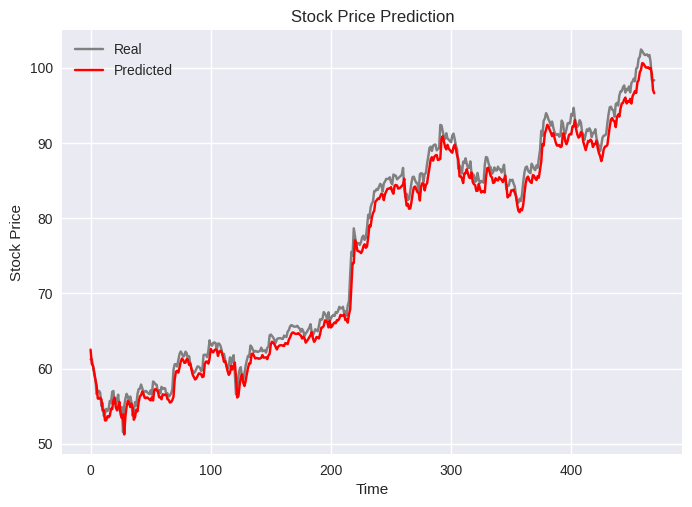

Root Mean Squared Error (RMSE) 1.54.


In [ ]:
# Training the GRU Model for JP Morgan & Chase
dataset = dataframes[2]
create_gru(dataset)

Wells Fargo:

Epoch 1/10
244/244 [==============================] - 5s 5ms/step - loss: 0.0052
Epoch 2/10
244/244 [==============================] - 1s 5ms/step - loss: 8.9046e-05
Epoch 3/10
244/244 [==============================] - 1s 5ms/step - loss: 8.3647e-05
Epoch 4/10
244/244 [==============================] - 1s 5ms/step - loss: 7.8062e-05
Epoch 5/10
244/244 [==============================] - 1s 5ms/step - loss: 7.0621e-05
Epoch 6/10
244/244 [==============================] - 1s 5ms/step - loss: 6.8609e-05
Epoch 7/10
244/244 [==============================] - 1s 5ms/step - loss: 6.7190e-05
Epoch 8/10
244/244 [==============================] - 1s 5ms/step - loss: 6.3304e-05
Epoch 9/10
244/244 [==============================] - 1s 5ms/step - loss: 6.2200e-05
Epoch 10/10
244/244 [==============================] - 2s 6ms/step - loss: 6.1609e-05
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #  

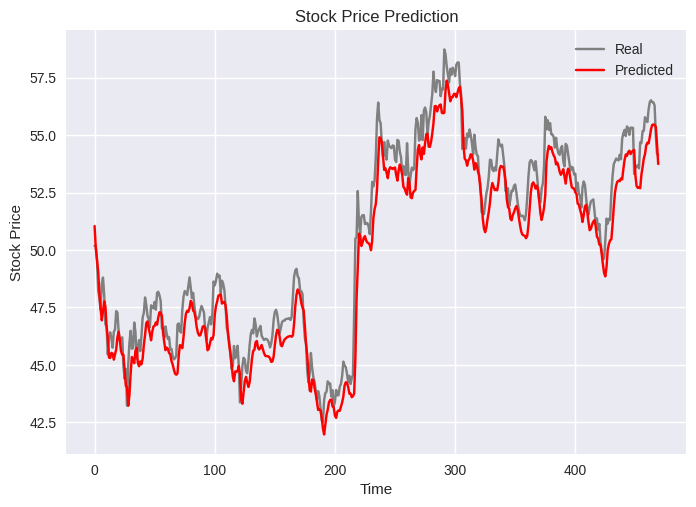

Root Mean Squared Error (RMSE) 1.10.


In [ ]:
# Training the GRU Model for Wells Fargo
dataset = dataframes[3]
create_gru(dataset)

Coca-Cola:

Epoch 1/10
361/361 [==============================] - 4s 6ms/step - loss: 0.0021
Epoch 2/10
361/361 [==============================] - 2s 5ms/step - loss: 4.9915e-05
Epoch 3/10
361/361 [==============================] - 2s 5ms/step - loss: 4.9131e-05
Epoch 4/10
361/361 [==============================] - 2s 5ms/step - loss: 4.2624e-05
Epoch 5/10
361/361 [==============================] - 2s 4ms/step - loss: 4.2545e-05
Epoch 6/10
361/361 [==============================] - 2s 5ms/step - loss: 4.1022e-05
Epoch 7/10
361/361 [==============================] - 2s 5ms/step - loss: 3.9993e-05
Epoch 8/10
361/361 [==============================] - 2s 6ms/step - loss: 4.1566e-05
Epoch 9/10
361/361 [==============================] - 2s 5ms/step - loss: 3.8225e-05
Epoch 10/10
361/361 [==============================] - 2s 5ms/step - loss: 3.9223e-05
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #  

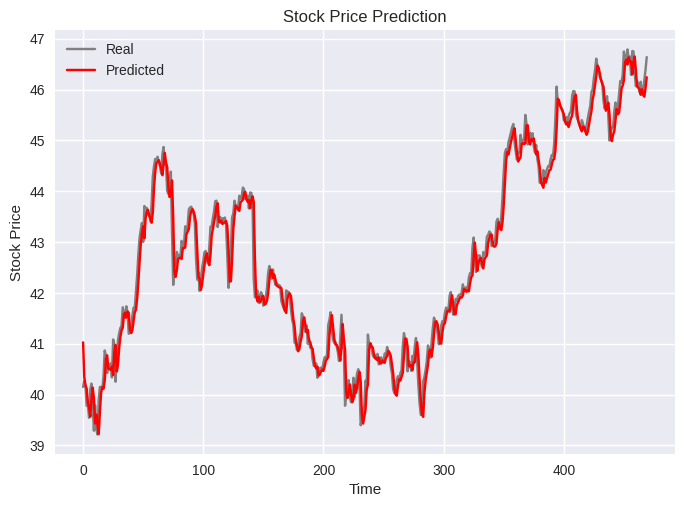

Root Mean Squared Error (RMSE) 0.29.


In [ ]:
# Training the GRU Model for Coca-Cola
dataset = dataframes[4]
create_gru(dataset)